In [63]:
import sys
sys.path.append('../modules')

from datacube import read_data
from operators import *
from preprocessing import *
from eof import *
from gridding import *
from mapper import *
from scipy import interpolate

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.feature
import seaborn as sns
import pandas as pd


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
PATH = '/storage/data/projects/nrc/CanRCM4_large_ensemble/design_values/tas/hdd/*.nc'
#PATH = '/home/nannau/Desktop/ensembles/jan1.0p/*'
#PATH = '/storage/data/projects/nrc/CanRCM4_large_ensemble/design_values/tas/jul2.5p/*.nc'

In [92]:
ds = read_data(PATH)
dv_field = ds['dv'].values.copy()
ens = ens_flat(dv_field)
rlat, rlon = ds['rlat'].values, ds['rlon'].values

In [98]:
f = interpolate.interp2d(rlon, rlat, dv_field[0, ...], kind='linear', fill_value=-99999)

irlon = np.linspace(np.min(rlon), np.max(rlon), rlon.shape[0]*10)
irlat = np.linspace(np.min(rlat), np.max(rlat), rlat.shape[0]*10)

rlon_ens = np.tile(rlon, rlat.shape[0])
rlat_ens = np.repeat(rlat, rlon.shape[0])

irlon_ens = np.tile(irlon, irlat.shape[0])
irlat_ens = np.repeat(irlat, irlon.shape[0])
iens = np.array(list(zip(irlon_ens, irlat_ens)))

coordens = np.array(list(zip(rlon_ens, rlat_ens)))

In [105]:
mask = load_land_mask('../data/mask.nc')

mask_master = mask_land_and_nan(dv_field, mask)

fmask = interpolate.interp2d(rlon, rlat, mask_master, kind = 'linear')
imask = fmask(irlon, irlat)
imask = np.expand_dims(imask.astype(bool), axis=0)

idx = mask_land_and_nan_ens_index(imask)

# now do this for every ensmble member!
points = iens[idx]
f = interpolate.griddata(coordens, ens[i, ...], points)

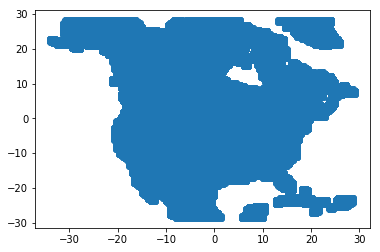

In [111]:
irlon, irlat = np.array(list(zip(*iens[idx])))
plt.scatter(irlon, irlat)

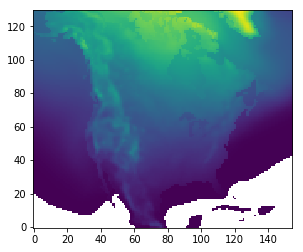

In [89]:
points = iens[idx]
idx
#interpolate.griddata(iens, dv_field[0, ...], points )

#idv_field = f(irlon, irlat)
#idv_field
plt.imshow(dv_field[0, ...])
plt.gca().invert_yaxis()
plt.show()

In [37]:
mask = load_land_mask('../data/mask.nc')
fmask = interpolate.interp2d(rlon, rlat, mask, kind = 'linear')
imask = fmask(irlon, irlat)
imask = imask.astype(bool)

mask_master = np.expand_dims(mask_land_and_nan(idv_field, imask), axis=0)
idx = mask_land_and_nan_ens_index(mask_master)

In [46]:
mask = load_land_mask('../data/mask.nc')
mask_master = mask_land_and_nan(dv_field, mask)
idx = mask_land_and_nan_ens_index(mask_master)

mask

(1, 130, 155)

In [10]:
ens = ens_flat(dv_field)

In [13]:
area = frac_grid_area(rlon, rlat)
area_relevent_grid_cells = area.reshape(1, -1)
area_relevent_grid_cells.shape

(1, 20150)

In [14]:
mean = ens.mean(axis=0).reshape(1, -1)

In [15]:
corr_ens = (ens - mean)*area_relevent_grid_cells      
corr_ens = corr_ens[:, idx]